# Advanced Features
----

<div class="alert alert-box alert-info">
Please use Jupyter labs http://&lt;board_ip_address&gt;/lab for this notebook.
</div>

This notebook shows some advanced features in the composable overlay API, which can be very helpful when you design your own composable overlay

## Aims
* Show advance features of the API

## Table of Contents
* [Download Composable Overlay](#download)
* [Enable Graph Debug](#debug)
* [Let us Compose](#compose)
* [Visualize the Pipeline](#visualize)
* [Set Graph Direction](#direction)
* [AXI4-Stream Switch](#switch)
* [Conclusion](#conclusion)

----

## Revision History

* v1.0 | 30 March 2021 | First notebook revision.
* v1.1 | 11 August 2021 | Update notebook to composable overlay API 1.0.0

----

## Download Composable Overlay <a class="anchor" id="download"></a>

Import the pynq video libraries as well as Composable class and the drivers for the IP.

Download the Composable Overlay using `pynq.Overlay` and grab a handler to the `composable` hierarchy

In [1]:
from pynq import Overlay
from pynq.lib.video import *
from pynq_composable import *

ol = Overlay("cv_dfx_4_pr.bit")

cpipe = ol.composable

## Enable Graph Debug <a class="anchor" id="debug"></a>

This attribute will enable debug mode in the graph. With this attribute enabled, the graph displays the consumer and producer interfaces the IP objects are connected to/from.

In [2]:
cpipe._graph_debug = True

## Let us Compose <a class="anchor" id="compose"></a>

First we need to grab handlers to the IP objects to simplify the notebook

In [3]:
filter2d = cpipe.filter2d_accel
rgb2hsv = cpipe.rgb2hsv_accel
gray2rgb = cpipe.gray2rgb_accel
lut = cpipe.lut_accel

In [4]:
video_pipeline = [cpipe.hdmi_source_in, lut, rgb2hsv, gray2rgb, filter2d, cpipe.hdmi_source_out]

cpipe.compose(video_pipeline)

## Visualize the Pipeline <a class="anchor" id="visualize"></a>

We can visualize the implemented pipeline with the `.graph` attribute. This allows to quickly verify the pipeline, and since debug is enabled extra information is shown

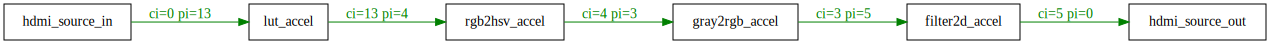

In [5]:
cpipe.graph

## Set Graph Direction <a class="anchor" id="direction"></a>

You can set the direction of graph layout using the `rankdir` [attribute](https://graphviz.org/doc/info/attrs.html#k:rankdir).

Valid values are `TB` (Top to Bottom), `LR` (Left to Right) **default**, `BT` (Bottom to Top) and `RL` (Right to Left)

In [6]:
cpipe.graph.graph_attr['rankdir'] = 'BT'

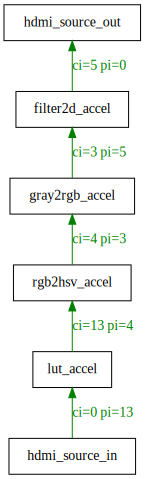

In [7]:
cpipe.graph

## AXI4-Stream Switch <a class="anchor" id="switch"></a>

The AXI4-Stream Switch is the core of the composable overlay. The AXI4-Stream Switch has a unique register (PIx_MUX) for each producer interface port. Each PIx_MUX value controls the consumer interface selection. 

![](../img/mi_mux_reg.png)

Read the documentation of the python driver that controls the AXI4-Stream Switch

In [8]:
cpipe.axis_switch?

Type:        StreamSwitch
String form: <pynq_composable.switch.StreamSwitch object at 0xb5070f58>
File:        /usr/local/share/pynq-venv/lib/python3.8/site-packages/pynq_composable/switch.py
Docstring:  
AXI4-Stream Switch python driver

This class provides the driver to control an AXI4-Stream Switch
which uses the AXI4-Lite interfaces to specify the routing table.
This routing mode requires that there is precisely only one path between
producer and consumer. When attempting to map the same consumer interface
to multiple producer interfaces, only the lowest consumer interface is
able to access the consumer interface.
Unused producer interfaces are automatically disabled by the logic
provided in this driver


In [9]:
cpipe.axis_switch.pi?

Type:        property
String form: <property object at 0xaf2ea870>
Docstring:  
AXI4-Stream Switch configuration

Configure the AXI4-Stream Switch given a numpy array
Each element in the array controls a consumer interface selection.
If more than one element in the array is set to the same consumer
interface, then the lower producer interface wins.

Parameters
----------
conf_array : numpy array (dtype=np.int64)
    An array with the mapping of consumer to producer interfaces
    The index in the array is the producer interface and
    the value is the consumer interface slot
    The length of the array can vary from 1 to max slots
    Use negative values to indicate that a producer is disabled

    For instance, given this input [-1, 2, 1, 0]

        Consumer 2 will be routed to Producer 1

        Consumer 1 will be routed to Producer 2

        Consumer 0 will be routed to Producer 3

        Producer 0 is disabled


You can check the current AXI4-Stream Switch configuration using the `.pi` attribute.

Note, the index in the array is the producer interface number and  the value is the consumer interface number

In [10]:
cpipe.axis_switch.pi

array([         5,          1, 2147483648,          4,         13,
                3, 2147483648, 2147483648, 2147483648, 2147483648,
       2147483648, 2147483648, 2147483648,          0, 2147483648],
      dtype=int64)

## Conclusion <a class="anchor" id="conclusion"></a>

This notebook has shown how to use advance features from the `Composable` class

[⬅️ Build your own Application](06_build_application.ipynb) | | [Webcam Pipeline ➡️](08_webcam_pipeline.ipynb)

Copyright &copy; 2021 Xilinx, Inc

SPDX-License-Identifier: BSD-3-Clause

----